In [1]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

In [3]:
column_names = [
    "probe_id",        # 0
    "snp_id",          # 1
    "chrom",           # 2
    "position",        # 3
    "gc_content",      # 4
    "length",          # 5
    "unknown_flag",    # 6
    "ref_allele",      # 7
    "alt_allele",      # 8
    "allele_used",     # 9
    "seq_left",        # 10
    "snp_base",        # 11
    "seq_right",       # 12
    "full_sequence",   # 13
    "extra"            # 14 — 多出来的字段，正常行会是 NaN
]

# 读取原始文件（无表头）
df1 = pd.read_csv("../data/Tewhey_MPRA/master.geuvadis.probes.AsiSIremoved.out", sep="\t", header=None, names=column_names,)
df1

,probe_id,snp_id,chrom,position,gc_content,length,unknown_flag,ref_allele,alt_allele,allele_used,seq_left,snp_base,seq_right,full_sequence,extra
0,rs11548103_RC_A,rs11548103,1,153588340,57.300,150,1,C,T,C,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,G,GCACCATGGGACAGTGTCGGTCAGCCAACGCAGAGGTGGGCTCATT...,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,NaN
1,rs11548103_RC_B,rs11548103,1,153588340,56.700,150,1,C,T,T,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,A,GCACCATGGGACAGTGTCGGTCAGCCAACGCAGAGGTGGGCTCATT...,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,NaN
2,rs2016366_A,rs2016366,1,2513678,43.300,150,1,A,T,A,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,A,AAAGAATTCCCAAACTGATTAAAGATACCAACCCACAGACTCAAGA...,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,NaN
3,rs2016366_B,rs2016366,1,2513678,43.300,150,1,A,T,T,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,T,AAAGAATTCCCAAACTGATTAAAGATACCAACCCACAGACTCAAGA...,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,NaN
4,rs2016366_altA,rs2016366,1,2513678,43.300,150,1,A,T,A,TCGAGCCGTTGCACTCCAGCCTGGGCAAGAAGAGCAAAACTGCATC...,A,AAAGAATTCCCAAACTGATTAAAGATACCAACCCACAGACTCAAGA...,TCGAGCCGTTGCACTCCAGCCTGGGCAAGAAGAGCAAAACTGCATC...,rs2016175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78951,rs131816_RC_B,rs131816,22,50957462,50.700,150,1,C,T,T,TCCCTCAGCTTTAGTCACGGAGCCCAGAGGATTTGGCGGGTGCCTT...,A,TGCTCTGCTTGGTTCATTTTATTTCTTAGCAAATGTTCCTCTTTAA...,TCCCTCAGCTTTAGTCACGGAGCCCAGAGGATTTGGCGGGTGCCTT...,NaN
78952,rs131816_RC_altA,rs131816,22,50957462,50.700,150,1,C,T,C,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,G,TGCTCTGCTTGGTTCATTTTATTTCTTAGCAAATGTTCCTCTTTAA...,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,rs3091397
78953,rs131816_RC_altB,rs131816,22,50957462,50.000,150,1,C,T,T,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,A,TGCTCTGCTTGGTTCATTTTATTTCTTAGCAAATGTTCCTCTTTAA...,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,rs3091397
78954,rs2076041_RC_A,rs2076041,22,32803952,48.700,150,1,G,A,G,GTGGCTCATGCCACCCGCAACACTTTGAGAGACCAAGATGGAAGGA...,C,TGGGCAACATGGCAAGACCCTGTCTATACCAAAAAAATTAGTCAGG...,GTGGCTCATGCCACCCGCAACACTTTGAGAGACCAAGATGGAAGGA...,NaN


In [4]:
df2 = pd.read_csv('../data/Tewhey_MPRA/GSE75661_79k_collapsed_counts.txt.gz', sep='\t')
df2

,Oligo,Plasmid_r1,Plasmid_r2,Plasmid_r3,Plasmid_r4,Plasmid_r5,NA12878_r1,NA12878_r2,NA12878_r3,NA12878_r4,NA12878_r5,NA19239_r1,NA19239_r2,NA19239_r3,HepG2_r1,HepG2_r2,HepG2_r3,HepG2_r4,HepG2_r5
0,rs11548103_RC_A,1124,850,1264,857,1014,2050,1786,2405,2538,2241,1682,1676,1563,710,615,692,658,574
1,rs11548103_RC_B,1256,1075,1141,1017,1124,2034,1885,2136,2630,2157,1781,1515,1858,677,818,715,792,596
2,rs2016366_A,434,333,444,297,305,352,478,463,548,509,208,216,252,125,165,162,143,54
3,rs2016366_B,529,359,348,302,444,557,767,487,683,800,365,572,323,182,174,173,202,248
4,rs2016366_altA,896,790,699,602,743,1043,796,1189,1168,842,800,437,707,356,419,338,409,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78951,rs131816_RC_B,1329,1096,989,935,1100,1753,1486,1384,2306,1488,1277,1319,1119,520,535,604,541,392
78952,rs131816_RC_altA,812,716,1270,775,1152,1208,1195,1563,1361,1669,835,913,875,430,390,402,333,265
78953,rs131816_RC_altB,959,714,854,812,953,1332,921,1181,1647,1325,925,677,757,461,383,389,447,353
78954,rs2076041_RC_A,868,681,685,684,627,1265,1208,1377,1528,1244,894,922,833,347,377,423,387,382


In [5]:
df2.drop(columns='Oligo').sum(axis=0)

Plasmid_r1     66772811
Plasmid_r2     58454220
Plasmid_r3     63368891
Plasmid_r4     54615115
Plasmid_r5     61416101
NA12878_r1     94177508
NA12878_r2     81796657
NA12878_r3     97650156
NA12878_r4    116803193
NA12878_r5     91409869
NA19239_r1     70042179
NA19239_r2     70498817
NA19239_r3     73718342
HepG2_r1       40139256
HepG2_r2       43771232
HepG2_r3       42797551
HepG2_r4       48268650
HepG2_r5       36745305
dtype: int64

In [6]:
(df1['probe_id'] == df2['Oligo']).all()

True

In [7]:
df2['seq'] = df1['full_sequence']

<Axes: xlabel='Plasmid_r1', ylabel='Count'>

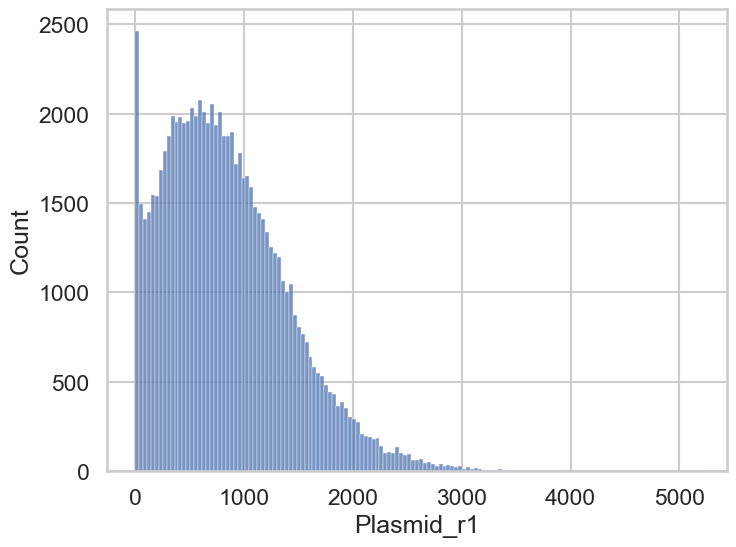

In [8]:
import seaborn as sns
sns.histplot(df2['Plasmid_r1'])

(0.0, 10000.0)

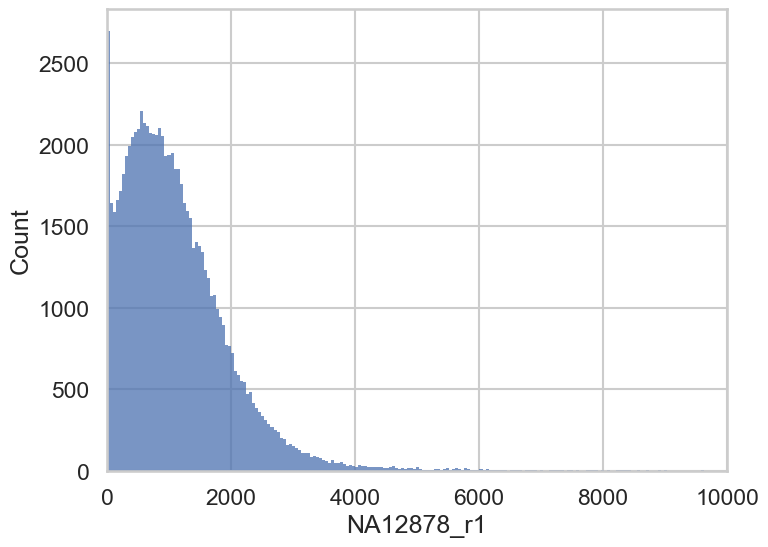

In [9]:
sns.histplot(df2['NA12878_r1'])
plt.xlim(0, 10000)

(0.0, 10000.0)

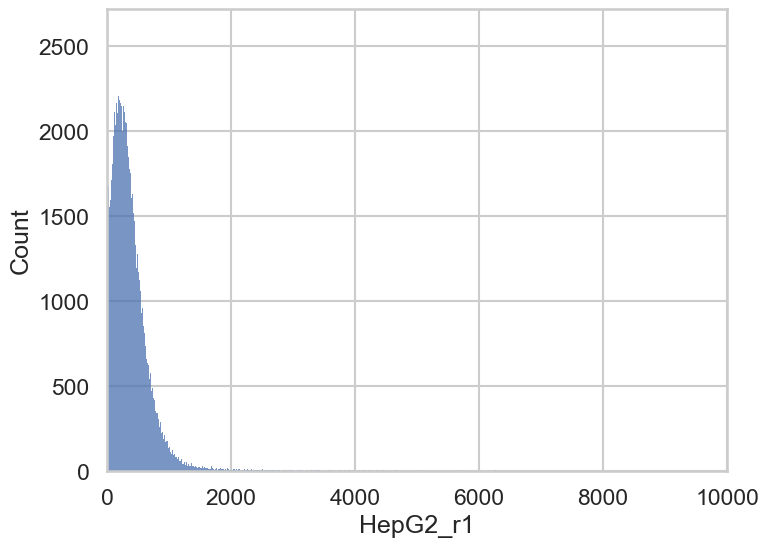

In [10]:
sns.histplot(df2['HepG2_r1'])
plt.xlim(0, 10000)

In [10]:
dna_cols = [f'Plasmid_r{i}' for i in range(1, 6)]
rna_cols = [f'NA12878_r{i}' for i in range(1, 6)] + [f'NA19239_r{i}' for i in range(1, 4)]
df2['DNA_mean'] = df2[dna_cols].mean(axis=1)
df2['LCL_RNA_mean'] = df2[rna_cols].mean(axis=1)
df2['LCL'] = np.log2(df2['LCL_RNA_mean'] / df2['DNA_mean'])



dna_cols = [f'Plasmid_r{i}' for i in range(1, 6)]
rna_cols = [f'HepG2_r{i}' for i in range(1, 6)]
df2['DNA_mean'] = df2[dna_cols].mean(axis=1)
df2['HepG2_RNA_mean'] = df2[rna_cols].mean(axis=1)
df2['HepG2'] = np.log2(df2['HepG2_RNA_mean'] / df2['DNA_mean'])

/home/hxcai/anaconda3/envs/torch/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/hxcai/anaconda3/envs/torch/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
df2

,Oligo,Plasmid_r1,Plasmid_r2,Plasmid_r3,Plasmid_r4,Plasmid_r5,NA12878_r1,NA12878_r2,NA12878_r3,NA12878_r4,...,HepG2_r2,HepG2_r3,HepG2_r4,HepG2_r5,seq,DNA_mean,LCL_RNA_mean,LCL,HepG2_RNA_mean,HepG2
0,rs11548103_RC_A,1124,850,1264,857,1014,2050,1786,2405,2538,...,615,692,658,574,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,1021.8,1992.625,0.963557,649.8,-0.653045
1,rs11548103_RC_B,1256,1075,1141,1017,1124,2034,1885,2136,2630,...,818,715,792,596,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,1122.6,1999.500,0.832795,719.6,-0.641577
2,rs2016366_A,434,333,444,297,305,352,478,463,548,...,165,162,143,54,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,362.6,378.250,0.060961,129.8,-1.482089
3,rs2016366_B,529,359,348,302,444,557,767,487,683,...,174,173,202,248,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,396.4,569.250,0.522105,195.8,-1.017576
4,rs2016366_altA,896,790,699,602,743,1043,796,1189,1168,...,419,338,409,254,TCGAGCCGTTGCACTCCAGCCTGGGCAAGAAGAGCAAAACTGCATC...,746.0,872.750,0.226393,355.2,-1.070544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78951,rs131816_RC_B,1329,1096,989,935,1100,1753,1486,1384,2306,...,535,604,541,392,TCCCTCAGCTTTAGTCACGGAGCCCAGAGGATTTGGCGGGTGCCTT...,1089.8,1516.500,0.476682,518.4,-1.071926
78952,rs131816_RC_altA,812,716,1270,775,1152,1208,1195,1563,1361,...,390,402,333,265,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,945.0,1202.375,0.347501,364.0,-1.376376
78953,rs131816_RC_altB,959,714,854,812,953,1332,921,1181,1647,...,383,389,447,353,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,858.4,1095.625,0.352032,406.6,-1.078040
78954,rs2076041_RC_A,868,681,685,684,627,1265,1208,1377,1528,...,377,423,387,382,GTGGCTCATGCCACCCGCAACACTTTGAGAGACCAAGATGGAAGGA...,709.0,1158.875,0.708867,383.2,-0.887688


In [12]:
df2 = df2[(df2['DNA_mean'] > 10) & (df2['LCL_RNA_mean'] > 10) & (df2['HepG2_RNA_mean'] > 10)]
df2

,Oligo,Plasmid_r1,Plasmid_r2,Plasmid_r3,Plasmid_r4,Plasmid_r5,NA12878_r1,NA12878_r2,NA12878_r3,NA12878_r4,...,HepG2_r2,HepG2_r3,HepG2_r4,HepG2_r5,seq,DNA_mean,LCL_RNA_mean,LCL,HepG2_RNA_mean,HepG2
0,rs11548103_RC_A,1124,850,1264,857,1014,2050,1786,2405,2538,...,615,692,658,574,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,1021.8,1992.625,0.963557,649.8,-0.653045
1,rs11548103_RC_B,1256,1075,1141,1017,1124,2034,1885,2136,2630,...,818,715,792,596,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,1122.6,1999.500,0.832795,719.6,-0.641577
2,rs2016366_A,434,333,444,297,305,352,478,463,548,...,165,162,143,54,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,362.6,378.250,0.060961,129.8,-1.482089
3,rs2016366_B,529,359,348,302,444,557,767,487,683,...,174,173,202,248,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,396.4,569.250,0.522105,195.8,-1.017576
4,rs2016366_altA,896,790,699,602,743,1043,796,1189,1168,...,419,338,409,254,TCGAGCCGTTGCACTCCAGCCTGGGCAAGAAGAGCAAAACTGCATC...,746.0,872.750,0.226393,355.2,-1.070544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78951,rs131816_RC_B,1329,1096,989,935,1100,1753,1486,1384,2306,...,535,604,541,392,TCCCTCAGCTTTAGTCACGGAGCCCAGAGGATTTGGCGGGTGCCTT...,1089.8,1516.500,0.476682,518.4,-1.071926
78952,rs131816_RC_altA,812,716,1270,775,1152,1208,1195,1563,1361,...,390,402,333,265,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,945.0,1202.375,0.347501,364.0,-1.376376
78953,rs131816_RC_altB,959,714,854,812,953,1332,921,1181,1647,...,383,389,447,353,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,858.4,1095.625,0.352032,406.6,-1.078040
78954,rs2076041_RC_A,868,681,685,684,627,1265,1208,1377,1528,...,377,423,387,382,GTGGCTCATGCCACCCGCAACACTTTGAGAGACCAAGATGGAAGGA...,709.0,1158.875,0.708867,383.2,-0.887688


In [17]:
def normalize(x):
    x = x.astype(float)
    x = (x - np.mean(x)) / np.std(x)
    return x



df2['HepG2'] = normalize(df2['HepG2'])
df2['LCL'] = normalize(df2['LCL'])

/tmp/ipykernel_2293/1142719686.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['HepG2'] = normalize(df2['HepG2'])
/tmp/ipykernel_2293/1142719686.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LCL'] = normalize(df2['LCL'])


<Axes: xlabel='LCL', ylabel='HepG2'>

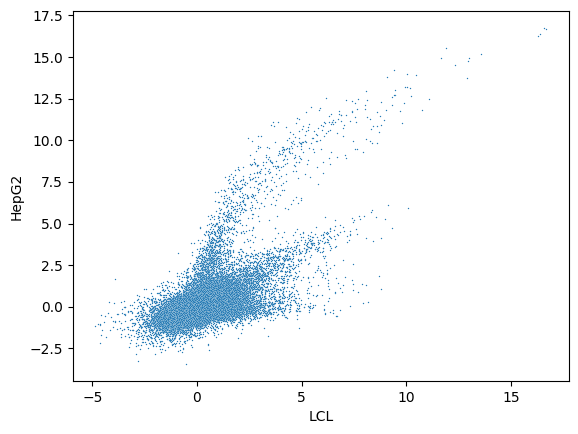

In [20]:
x = df2['LCL']
y = df2['HepG2']

sns.scatterplot(x=x, y=y, s=1)

In [31]:
df3 = df2[['Oligo', 'seq', 'HepG2', 'LCL']]
df3

,Oligo,seq,HepG2,LCL
0,rs11548103_RC_A,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,0.690992,1.380917
1,rs11548103_RC_B,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,0.711115,1.072392
2,rs2016366_A,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,-0.763701,-0.748701
3,rs2016366_B,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,0.051362,0.339339
4,rs2016366_altA,TCGAGCCGTTGCACTCCAGCCTGGGCAAGAAGAGCAAAACTGCATC...,-0.041578,-0.358376
...,...,...,...,...
78951,rs131816_RC_B,TCCCTCAGCTTTAGTCACGGAGCCCAGAGGATTTGGCGGGTGCCTT...,-0.044003,0.232166
78952,rs131816_RC_altA,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,-0.578211,-0.072629
78953,rs131816_RC_altB,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,-0.054731,-0.061938
78954,rs2076041_RC_A,GTGGCTCATGCCACCCGCAACACTTTGAGAGACCAAGATGGAAGGA...,0.279273,0.779992


In [32]:
df3 = df3.rename(columns={'Oligo':'seq_id'})

In [33]:
df3

,seq_id,seq,HepG2,LCL
0,rs11548103_RC_A,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,0.690992,1.380917
1,rs11548103_RC_B,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,0.711115,1.072392
2,rs2016366_A,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,-0.763701,-0.748701
3,rs2016366_B,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,0.051362,0.339339
4,rs2016366_altA,TCGAGCCGTTGCACTCCAGCCTGGGCAAGAAGAGCAAAACTGCATC...,-0.041578,-0.358376
...,...,...,...,...
78951,rs131816_RC_B,TCCCTCAGCTTTAGTCACGGAGCCCAGAGGATTTGGCGGGTGCCTT...,-0.044003,0.232166
78952,rs131816_RC_altA,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,-0.578211,-0.072629
78953,rs131816_RC_altB,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,-0.054731,-0.061938
78954,rs2076041_RC_A,GTGGCTCATGCCACCCGCAACACTTTGAGAGACCAAGATGGAAGGA...,0.279273,0.779992


In [34]:
df3.to_csv('../data/Tewhey_MPRA/Tewhey_MPRA.csv', index=False)

In [5]:
df3 = pd.read_csv('../data/Tewhey_MPRA/Tewhey_MPRA.csv')
df3

,seq_id,seq,HepG2,LCL
0,rs11548103_RC_A,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,0.691,1.381
1,rs11548103_RC_B,CAGATCATGAGCCATCAGCTCCTCTGGGGCCAGCTATAGGACAACA...,0.711,1.072
2,rs2016366_A,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,-0.764,-0.749
3,rs2016366_B,TCGAGCCGTTGCACTCCAGCCTGGGCAACAAGAGCAAAACTGCATC...,0.051,0.339
4,rs2016366_altA,TCGAGCCGTTGCACTCCAGCCTGGGCAAGAAGAGCAAAACTGCATC...,-0.042,-0.358
...,...,...,...,...
77276,rs131816_RC_B,TCCCTCAGCTTTAGTCACGGAGCCCAGAGGATTTGGCGGGTGCCTT...,-0.044,0.232
77277,rs131816_RC_altA,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,-0.578,-0.073
77278,rs131816_RC_altB,TCCCTCAGCTTTAGTCATGGAGCCCAGAGGATTTGGCGGGTGCCTT...,-0.055,-0.062
77279,rs2076041_RC_A,GTGGCTCATGCCACCCGCAACACTTTGAGAGACCAAGATGGAAGGA...,0.279,0.780


In [6]:
df3['seq'] = df3['seq'].map(lambda seq: seq.replace('-', 'N'))

In [7]:
df3.to_csv('../data/Tewhey_MPRA/Tewhey_MPRA.csv', index=False)